# Data Analysis tasks



In [45]:
import pandas as pd
source = "https://raw.githubusercontent.com/R4F4I/semester-3-FAST-K240009/refs/heads/master/PAI/LAB/assignments/lab_6_7_8/Mobile%20Reviews%20Sentiment.csv"
df = pd.read_csv(source)

## Q1.
Plot the average overall rating for each mobile brand also shown in the chart.

In [46]:
avg_ratings = df.groupby('brand')['rating'].mean().sort_values(ascending=False)

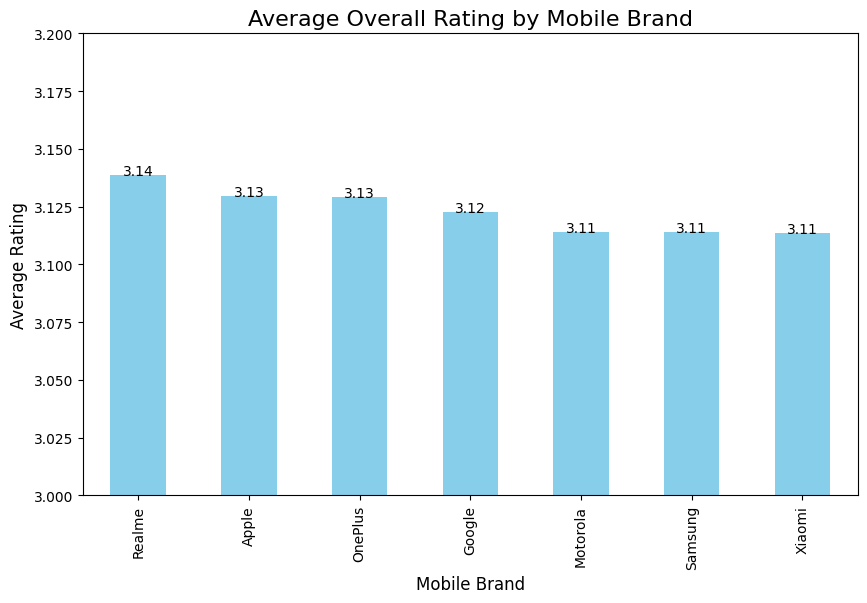

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
bars = avg_ratings.plot(kind='bar', color='skyblue')

plt.ylim(3, 3.2)

# Add titles and labels
plt.title('Average Overall Rating by Mobile Brand', fontsize=16)
plt.xlabel('Mobile Brand', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
# plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better fit
# plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines

# Annotate each bar with its average rating value
for bar in bars.patches:
    # Get the height of the bar (the average rating)
    rating_value = bar.get_height()
    # Add the text label above the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2, # x position (center of the bar)
        rating_value + 0.0,               # y position (just above the bar)
        f'{rating_value:.2f}',             # text format (2 decimal places)
        ha='center',                       # horizontal alignment
        fontsize=10
    )

# plt.tight_layout() # Adjust layout to make room for label rotation
plt.show()

## Q2.
Show the average price (in USD) for each mobile brand also shown in the chart.

In [48]:
avg_price = df.groupby('brand')['price_usd'].mean()

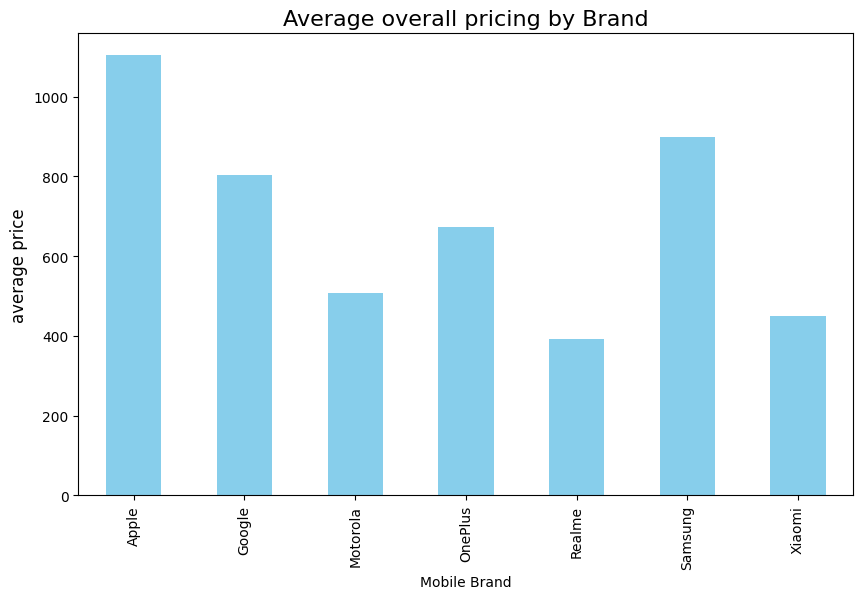

In [49]:
plt.figure(figsize=(10,6))
bars = avg_price.plot(kind='bar',color='skyblue')

plt.title("Average overall pricing by Brand", fontsize=16)
plt.xlabel('Mobile Brand')
plt.ylabel('average price',fontsize=12)

plt.show()

## Q3.
Show how ratings are distributed across all reviews (Histogram)

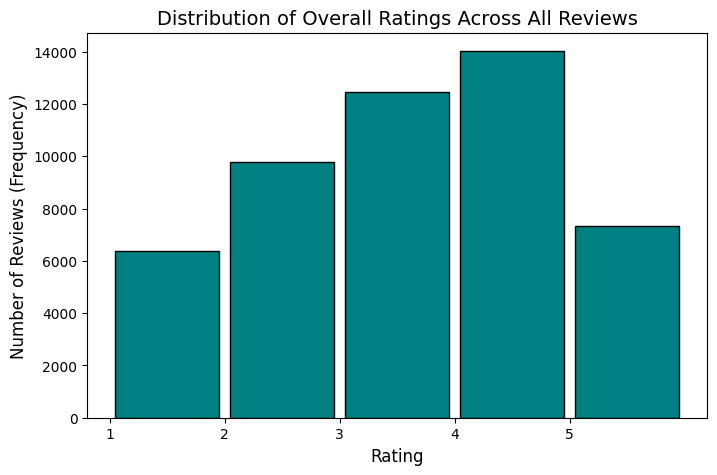

In [50]:
# get all ratings
df_ratings = df['rating'].dropna()

plt.figure(figsize=(8,5))

min_rating = int(df['rating'].min())
max_rating = int(df['rating'].max())

bins = [i for i in range(min_rating,max_rating+2)]

hist = plt.hist(df_ratings,bins=bins,edgecolor='black', color = 'teal',rwidth=0.9)

plt.xticks(range(min_rating, max_rating + 1))

plt.title('Distribution of Overall Ratings Across All Reviews', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews (Frequency)', fontsize=12)

plt.show()

## Q4.
Show sentiment distribution (positive, negative, neutral). (Piechart)

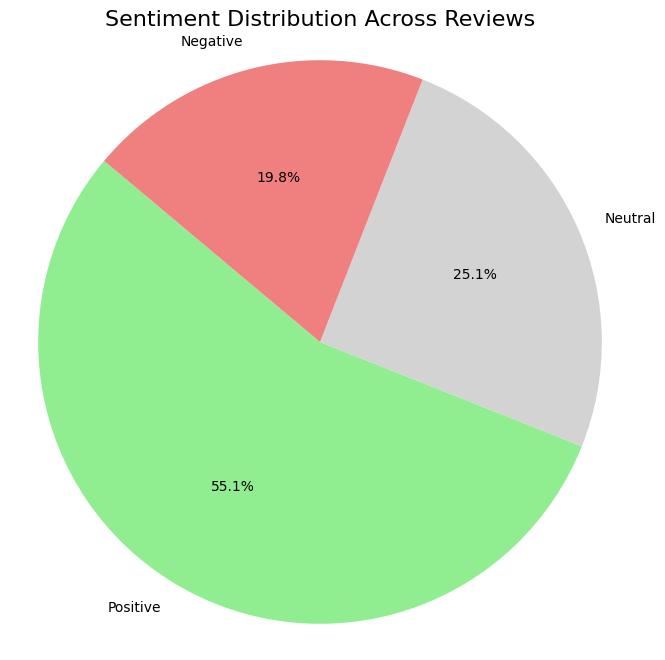

In [51]:
sentiment_counts = df['sentiment'].value_counts()

# print(sentiment_counts)

# Define colors for the pie chart slices
colors = {
    'positive': 'lightgreen',
    'neutral': 'lightgray',
    'negative': 'lightcoral'
}

# Order the labels and colors for consistent plotting
labels = ['positive', 'neutral', 'negative']
# ordered_counts = sentiment_counts.reindex(labels, fill_value=0)
# print("oder-> ",ordered_counts)
# print("oderend ")
ordered_colors = [colors[label] for label in labels]

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=ordered_colors)
plt.title('Sentiment Distribution Across Reviews', fontsize=16)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Q5.
Detect models that have price above overall mean but rating below overall mean — mark them on a scatter (Find "Overpriced Models (High Price, Low Rating))

# Task
Analyze the `df` DataFrame to identify and visualize "Overpriced Models (High Price, Low Rating)". This involves:
1. Calculating the overall mean `price_usd` and overall mean `rating` for all mobile models.
2. Identifying models where the `price_usd` is above the overall mean `price_usd` AND the `rating` is below the overall mean `rating`.
3. Creating a scatter plot with `price_usd` on the x-axis and `rating` on the y-axis for all models.
4. On this scatter plot, distinctly highlight the identified "overpriced models" with a different color and marker.
5. Add horizontal and vertical lines to the scatter plot representing the overall mean `rating` and overall mean `price_usd`, respectively.
6. Include appropriate labels, a title, and a legend for clarity.
7. Finally, summarize the findings from the scatter plot, specifically highlighting the identified "Overpriced Models (High Price, Low Rating)".

## Calculate Overall Means

### Subtask:
Calculate the overall mean price (`price_usd`) and the overall mean rating (`rating`) from the DataFrame.


**Reasoning**:
Calculate the overall mean price and rating from the 'df' DataFrame as requested.



In [52]:
overall_mean_price = df['price_usd'].mean()
overall_mean_rating = df['rating'].mean()
print(f"Overall Mean Price (USD): {overall_mean_price:.2f}")
print(f"Overall Mean Rating: {overall_mean_rating:.2f}")

Overall Mean Price (USD): 689.69
Overall Mean Rating: 3.12


## Identify Overpriced Models

### Subtask:
Filter the DataFrame to find models where `price_usd` is greater than the overall mean price AND `rating` is less than the overall mean rating. These will be our 'overpriced models'.


In [53]:
overpriced_models_df = df[(df['price_usd'] > overall_mean_price) & (df['rating'] < overall_mean_rating)]
print("Overpriced Models (first 5 rows):")
print(overpriced_models_df.head())

Overpriced Models (first 5 rows):
    review_id         customer_name  age     brand           model  price_usd  \
4           5             Yago Leão   38  Motorola         Edge 50     792.13   
7           8          James Howard   39     Apple       iPhone SE    1443.76   
14         15    Ms Hollie Phillips   39   Samsung  Galaxy Note 20    1146.49   
20         21  Charles Kelly-Morley   46     Apple       iPhone SE    1470.12   
24         25     Shannon Hernandez   27     Apple   iPhone 15 Pro     997.61   

   price_local currency  exchange_rate_to_usd  rating  ... verified_purchase  \
4    R$4515.14      BRL                  5.70       3  ...              True   
7    A$2208.95      AUD                  1.53       2  ...              True   
14     £894.26      GBP                  0.78       3  ...              True   
20    £1146.69      GBP                  0.78       1  ...             False   
24     $997.61      USD                  1.00       3  ...              True   

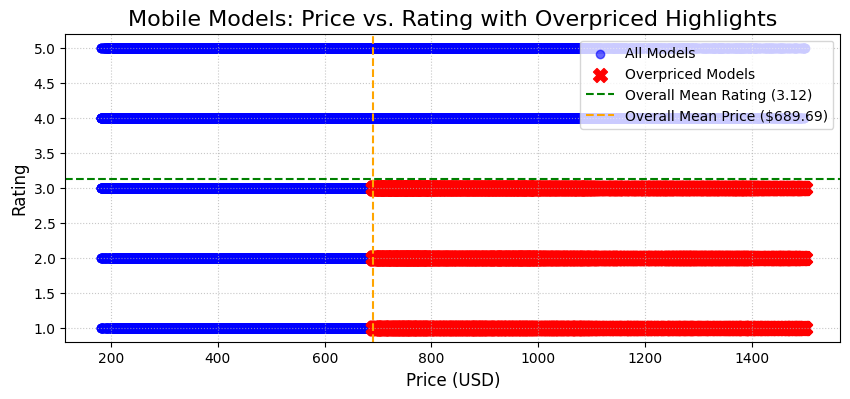

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Plot all models
plt.scatter(df['price_usd'], df['rating'], color='blue', alpha=0.6, label='All Models')

# Plot overpriced models
plt.scatter(overpriced_models_df['price_usd'], overpriced_models_df['rating'], color='red', marker='X', s=100, label='Overpriced Models')

# Add horizontal line for overall mean rating
plt.axhline(y=overall_mean_rating, color='green', linestyle='--', label=f'Overall Mean Rating ({overall_mean_rating:.2f})')

# Add vertical line for overall mean price
plt.axvline(x=overall_mean_price, color='orange', linestyle='--', label=f'Overall Mean Price (${overall_mean_price:.2f})')

# Add titles and labels
plt.title('Mobile Models: Price vs. Rating with Overpriced Highlights', fontsize=16)
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

## Q6.
Visualize how sentiment (positive, neutral, negative) aligns with numeric rating values.  [Sentiment vs Rating Comparison (Box Plot)]

## Q6. Visualize how sentiment (positive, neutral, negative) aligns with numeric rating values.  [Sentiment vs Rating Comparison (Box Plot)]

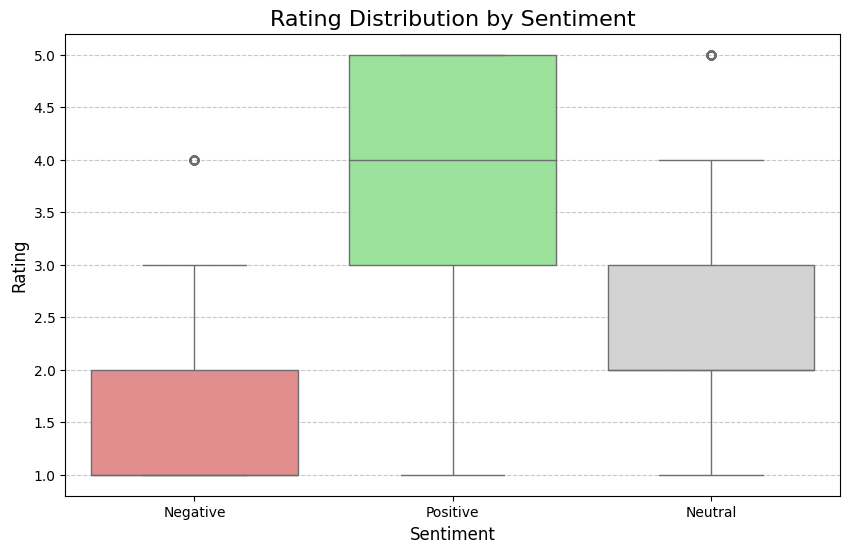

In [57]:
import seaborn as sns

plt.figure(figsize=(10, 6))
# Corrected palette keys to match the actual sentiment values in the DataFrame
# Also added hue='sentiment' and legend=False to address the deprecation warning
sns.boxplot(x='sentiment', y='rating', data=df, palette={'Positive': 'lightgreen', 'Neutral': 'lightgray', 'Negative': 'lightcoral'}, hue='sentiment', legend=False)
plt.title('Rating Distribution by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()